In [6]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
from freq_pd import proc_freq

In [7]:
prod_clusters = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\product_clusters.csv',dtype={'Item_Number':str}, index_col=0)

In [8]:
pdtypes = {'Item Number':str,'Vendor':str}

In [13]:
products_iowa = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\Iowa_Liquor_Products(1).csv',dtype=pdtypes)

In [8]:
# products_iowa.rename({'Item Description':'Item_Description'} ,axis=1, inplace=True)

In [17]:
products_iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10568 entries, 0 to 10567
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item Number          10568 non-null  object 
 1   Category Name        10568 non-null  object 
 2   Item Description     10568 non-null  object 
 3   Vendor               10568 non-null  object 
 4   Vendor Name          10568 non-null  object 
 5   Bottle Volume (ml)   10568 non-null  int64  
 6   Pack                 10568 non-null  int64  
 7   Inner Pack           10568 non-null  int64  
 8   Age                  10568 non-null  int64  
 9   Proof                10568 non-null  int64  
 10  List Date            10568 non-null  object 
 11  UPC                  10567 non-null  float64
 12  SCC                  10568 non-null  int64  
 13  State Bottle Cost    10568 non-null  float64
 14  State Case Cost      10568 non-null  float64
 15  State Bottle Retail  10568 non-null 

In [15]:
products_iowa.head()

,Item Number,Category Name,Item Description,Vendor,Vendor Name,Bottle Volume (ml),Pack,Inner Pack,Age,Proof,List Date,UPC,SCC,State Bottle Cost,State Case Cost,State Bottle Retail,Report Date
0,901141,Special Order Items,Libertine Absinthe(French Absinthe) Mini,885,YAHARA BAY DISTILLERS INC,50,6,1,0,114,04/20/2012,NaN,10892060104050,4.82,28.90,7.23,04/01/2022
1,65017,Imported Cordials & Liqueurs,Galliano Liqueur,305,Mhw LTD,375,12,1,0,84,10/01/2012,8.091511e+10,10892060104050,10.75,129.00,16.13,04/01/2022
2,88152,100% Agave Tequila,Sauza 901 Silver,065,Jim Beam Brands,750,6,1,0,80,06/01/2014,8.068684e+10,10892060104050,13.12,78.72,19.68,04/01/2022
3,903796,Special Order Items,Bacardi Anejo DISCO,035,BACARDI USA INC,750,12,1,0,80,09/01/1990,8.068684e+10,80480004347,7.75,93.00,11.63,04/01/2022
4,905846,Scotch Whiskies,Ron Burgundy,305,Mhw LTD,750,12,1,0,80,10/01/2014,8.068684e+10,10626990143885,14.61,175.25,21.92,04/01/2022


In [ ]:
products_iowa.drop(columns=['UPC','SCC',])

In [10]:
# proc_freq(products_iowa,'Age') 96% have age zero

In [11]:
# item_trans_category = item_trans_category.merge(products, how='inner', on=['Item_Number','Category'])

In [12]:
# prod_clusters_iowa = prod_clusters.merge(products_iowa, how='inner',on=['Item Description'])

In [13]:
prod_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4468 entries, 1 to 4474
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         4468 non-null   object 
 1   Item_Description    4468 non-null   object 
 2   Bottle_Volume       4468 non-null   int64  
 3   Bottle_Retail       4468 non-null   float64
 4   Bottles_Sold        4468 non-null   int64  
 5   cluster_name        4468 non-null   object 
 6   revenue             4468 non-null   float64
 7   Num_Stores_Selling  4468 non-null   int64  
 8   New_Category_Name   4468 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 349.1+ KB


In [14]:
prod_clusters.describe()

,Bottle_Volume,Bottle_Retail,Bottles_Sold,revenue,Num_Stores_Selling
count,4468.000000,4468.000000,4468.000000,4.468000e+03,4468.000000
mean,790.111459,29.786602,6469.726276,9.427726e+04,125.172784
std,399.598407,40.519409,24383.432230,3.870390e+05,214.062447
min,20.000000,0.990000,1.000000,7.500000e+00,1.000000
25%,750.000000,11.781951,53.000000,1.394925e+03,3.000000
50%,750.000000,20.250000,548.000000,1.301850e+04,49.000000
75%,750.000000,35.000000,3624.250000,5.271280e+04,154.250000
max,2400.000000,1012.500000,563260.000000,1.062280e+07,1725.000000


In [15]:

everything_else = prod_clusters.loc[prod_clusters['cluster_name']=='Everything_Else',:]

In [16]:
everything_else.head(10)

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,cluster_name,revenue,Num_Stores_Selling,New_Category_Name
1,10006,Scoresby Rare Scotch,750,7.70,4619,Everything_Else,35566.30,197,Scotch
2,100077,Kraken Rum w/ Tiki Glass,750,15.68,2679,Everything_Else,42006.72,136,Temporary & Specialty Packages
4,10009,Scoresby Rare Scotch,1000,10.11,1722,Everything_Else,17409.42,70,Scotch
5,100148,Jack Daniels Single Barrel w/Snifter Glass,750,41.39,606,Everything_Else,25082.34,120,Temporary & Specialty Packages
6,100202,Baileys Original Irish Cream w/2 Dessert Bowls,750,24.74,3160,Everything_Else,78178.40,149,Temporary & Specialty Packages
7,100210,Clyde Mays Dualpack,750,30.00,66,Everything_Else,1980.00,1,Temporary & Specialty Packages
8,100215,Tequila Rose Liqueur w/2 Shot Glasses,750,17.25,1191,Everything_Else,20544.75,161,Temporary & Specialty Packages
9,100216,Tarantula Azul Holiday w/2 Shot Glasses,750,13.49,133,Everything_Else,1794.17,24,Temporary & Specialty Packages
10,100248,Martell Blue Swift w/ 2 Glasses,750,31.47,47,Everything_Else,1479.09,8,Temporary & Specialty Packages
11,100280,The Bitter Truth Cocktail Bar Pack,20,14.25,180,Everything_Else,2565.00,38,Cocktails /RTD


In [17]:
scaler = StandardScaler()

In [18]:
everything_else[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]] = scaler.fit_transform\
                                           (everything_else[['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']])
                                                   

everything_else[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled']].describe()

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled
count,3.865000e+03,3.865000e+03,3.865000e+03
mean,3.364277e-16,1.682857e-16,3.574401e-16
std,1.000129e+00,1.000129e+00,1.000129e+00
min,-2.729344e+00,-1.225166e+00,-4.122119e-01
25%,2.940176e-01,-7.271004e-01,-4.072315e-01
50%,2.940176e-01,-2.887442e-01,-3.646331e-01
75%,2.940176e-01,4.015575e-01,-7.555770e-02
max,2.157733e+00,4.770556e+00,8.195200e+00


determine optimal number of clusters

In [19]:
from sklearn.metrics import silhouette_score

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]

df_scaled = everything_else[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.5476749092196834
number of clusters =  3   silhouette score =  0.5613020736206006
number of clusters =  4   silhouette score =  0.5320984497321875
number of clusters =  5   silhouette score =  0.4273416563810066
number of clusters =  6   silhouette score =  0.4557098270790325
number of clusters =  7   silhouette score =  0.4524231643048396
number of clusters =  8   silhouette score =  0.4774914363708594
number of clusters =  9   silhouette score =  0.48211295803567356
number of clusters =  10   silhouette score =  0.46449113056409397


In [20]:
inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

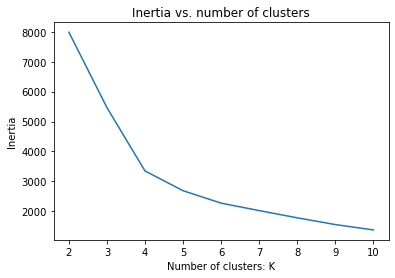

In [21]:
plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()

get three sub-clusters from everything_else

In [22]:
cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


model = KMeans(n_clusters=4, random_state=42)

model.fit(everything_else[cluster_cols])

everything_else['sub_cluster'] = model.predict(everything_else[cluster_cols])

C:\Users\dgarb\AppData\Local\Temp/ipykernel_19328/3938904934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['sub_cluster'] = model.predict(everything_else[cluster_cols])


In [23]:
everything_else.head()

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,cluster_name,revenue,Num_Stores_Selling,New_Category_Name,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,sub_cluster
1,10006,Scoresby Rare Scotch,750,7.70,4619,Everything_Else,35566.30,197,Scotch,0.294018,-0.899433,0.077139,0
2,100077,Kraken Rum w/ Tiki Glass,750,15.68,2679,Everything_Else,42006.72,136,Temporary & Specialty Packages,0.294018,-0.512049,-0.128435,0
4,10009,Scoresby Rare Scotch,1000,10.11,1722,Everything_Else,17409.42,70,Scotch,1.329415,-0.782441,-0.229844,0
5,100148,Jack Daniels Single Barrel w/Snifter Glass,750,41.39,606,Everything_Else,25082.34,120,Temporary & Specialty Packages,0.294018,0.736029,-0.348102,1
6,100202,Baileys Original Irish Cream w/2 Dessert Bowls,750,24.74,3160,Everything_Else,78178.40,149,Temporary & Specialty Packages,0.294018,-0.072236,-0.077465,0


In [24]:
everything_else['Bottle_Volume_liters'] = everything_else['Bottle_Volume']/1000

C:\Users\dgarb\AppData\Local\Temp/ipykernel_19328/2100188245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['Bottle_Volume_liters'] = everything_else['Bottle_Volume']/1000


# create price per milliliter

In [25]:
# price/volume
everything_else['price_per_ml'] = everything_else['Bottle_Retail'] / everything_else['Bottle_Volume']

C:\Users\dgarb\AppData\Local\Temp/ipykernel_19328/1856010719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['price_per_ml'] = everything_else['Bottle_Retail'] / everything_else['Bottle_Volume']


In [26]:
everything_else.groupby(['sub_cluster']).agg({'Bottle_Volume_liters' : 'mean', 'Bottle_Retail':'mean','Bottles_Sold':'mean' })

,Bottle_Volume_liters,Bottle_Retail,Bottles_Sold
sub_cluster,,,
0,0.782002,20.320400,2440.893532
1,0.720384,62.085440,466.208272
2,0.176077,12.443377,3759.709854
3,0.621026,12.868156,43626.019868


In [27]:
everything_else.groupby(['sub_cluster']).agg({'Bottle_Volume' :['min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'] })

Bottle_Volume                                      Bottle_Retail  \
                      min   max         std median        mean           min   
sub_cluster                                                                    
0                     600  1000   83.272480  750.0  782.002009          3.20   
1                      50  1200  151.435196  750.0  720.384047         40.88   
2                      20   400  143.107423  100.0  176.076642          0.99   
3                      50  1000  312.944254  750.0  621.026490          1.43   

                                                     Bottles_Sold         \
                    max        std median       mean          min    max   
sub_cluster                                                                
0             44.252710   9.612225  18.89  20.320400            1  24136   
1            124.500000  19.366405  54.75  62.085440            1  14939   
2             67.050000  10.193479   9.00  12.443377            1  27050   
3             44.322201   8.734963  11.25  12.868156        23303  81229   

                                                  
                      std   median          mean  
sub_cluster                                       
0             4108.531623    540.0   2440.893532  
1             1333.631047     60.0    466.208272  
2             5397.728335   1254.0   3759.709854  
3            14938.401062  39981.0  43626.019868

In [28]:
from freq_pd import proc_freq

In [29]:
proc_freq(everything_else,'sub_cluster')

,sub_cluster,Frequency,Percent,Cumulative_Frequency,Cumulative_Percent
0,0,2489,64.40,2489,64.40
1,1,677,17.52,3166,81.91
2,2,548,14.18,3714,96.09
3,3,151,3.91,3865,100.00


In [30]:
everything_else['str_volume'] = str(everything_else.Bottle_Volume)

C:\Users\dgarb\AppData\Local\Temp/ipykernel_19328/1745242950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['str_volume'] = str(everything_else.Bottle_Volume)


In [31]:
df = everything_else.groupby(['sub_cluster']).agg({'revenue':'sum'})
df.style.format("{:.0f}")


,revenue
sub_cluster,
0,97252083
1,17336184
2,17076434
3,83888139


In [32]:
everything_else.groupby(['sub_cluster']).agg({'Bottle_Volume':'nunique'})

,Bottle_Volume
sub_cluster,
0,8
1,9
2,8
3,6


In [33]:


everything_else.groupby(['sub_cluster']).agg({'Bottle_Volume':['min','max','std', 'median', 'mean'],'Bottle_Retail':['min','max','std', 'median', 'mean'], 'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'] })

Bottle_Volume                                      Bottle_Retail  \
                      min   max         std median        mean           min   
sub_cluster                                                                    
0                     600  1000   83.272480  750.0  782.002009          3.20   
1                      50  1200  151.435196  750.0  720.384047         40.88   
2                      20   400  143.107423  100.0  176.076642          0.99   
3                      50  1000  312.944254  750.0  621.026490          1.43   

                                                     price_per_ml           \
                    max        std median       mean          min      max   
sub_cluster                                                                  
0             44.252710   9.612225  18.89  20.320400     0.003200  0.06403   
1            124.500000  19.366405  54.75  62.085440     0.043914  2.43360   
2             67.050000  10.193479   9.00  12.443377     0.006880  1.34100   
3             44.322201   8.734963  11.25  12.868156     0.003200  0.77400   

                                          Bottles_Sold                       \
                  std    median      mean          min    max           std   
sub_cluster                                                                   
0            0.012943  0.025000  0.026436            1  24136   4108.531623   
1            0.355567  0.072600  0.156348            1  14939   1333.631047   
2            0.216653  0.086507  0.167800            1  27050   5397.728335   
3            0.074316  0.019103  0.035194        23303  81229  14938.401062   

                                    
              median          mean  
sub_cluster                         
0              540.0   2440.893532  
1               60.0    466.208272  
2             1254.0   3759.709854  
3            39981.0  43626.019868

In [34]:
everything_else.groupby(['sub_cluster']).agg({'Num_Stores_Selling':['min','max','std', 'median', 'mean']})

Num_Stores_Selling                                     
                           min   max         std median        mean
sub_cluster                                                        
0                            1   932  116.512873   44.0   89.310566
1                            1   901   83.666426    6.0   46.454948
2                            1  1308  182.020848   89.0  143.198905
3                           25  1551  389.641878  522.0  645.019868

In [35]:
pd.set_option('display.max_columns', None)
everything_else.groupby(['sub_cluster']).agg({'Item_Number':['nunique'],'revenue':['sum'],'Bottle_Volume':['min','max','std','median'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

Item_Number      revenue Bottle_Volume                           \
                nunique          sum           min   max         std median   
sub_cluster                                                                   
0                  2489  97252083.33           600  1000   83.272480  750.0   
1                   677  17336183.71            50  1200  151.435196  750.0   
2                   548  17076434.07            20   400  143.107423  100.0   
3                   151  83888139.41            50  1000  312.944254  750.0   

            price_per_ml                                        Bottles_Sold  \
                     min      max       std    median      mean          min   
sub_cluster                                                                    
0               0.003200  0.06403  0.012943  0.025000  0.026436            1   
1               0.043914  2.43360  0.355567  0.072600  0.156348            1   
2               0.006880  1.34100  0.216653  0.086507  0.167800            1   
3               0.003200  0.77400  0.074316  0.019103  0.035194        23303   

                                                        Num_Stores_Selling  \
               max           std   median          mean                min   
sub_cluster                                                                  
0            24136   4108.531623    540.0   2440.893532                  1   
1            14939   1333.631047     60.0    466.208272                  1   
2            27050   5397.728335   1254.0   3759.709854                  1   
3            81229  14938.401062  39981.0  43626.019868                 25   

                                                  
              max         std median        mean  
sub_cluster                                       
0             932  116.512873   44.0   89.310566  
1             901   83.666426    6.0   46.454948  
2            1308  182.020848   89.0  143.198905  
3            1551  389.641878  522.0  645.019868

In [36]:
everything_else['str_volume'] = [str(prod) for prod in everything_else.Bottle_Volume ]
# [str(prod) for prod in everything_else.Bottle_Volume ]

C:\Users\dgarb\AppData\Local\Temp/ipykernel_19328/3195886119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['str_volume'] = [str(prod) for prod in everything_else.Bottle_Volume ]


# Name sub-clusters

In [37]:
sub_clust_dict = {0:'most_variety', 1:'moderately_high', 2:'quick_shots', 3:'cheap'}
# everything_else['sub_cluster'].map(sub_clust_dict)
everything_else['sub_cluster_name'] = everything_else['sub_cluster'].map(sub_clust_dict)

C:\Users\dgarb\AppData\Local\Temp/ipykernel_19328/1314442791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['sub_cluster_name'] = everything_else['sub_cluster'].map(sub_clust_dict)


In [38]:
# df_categ = everything_else.groupby(['sub_cluster','New_Category_Name']).agg({'price_per_ml':['min','max','std', 'median', 'mean']}).reset_index()

In [39]:
# df_categ.loc[df_categ.sub_cluster==2,:]

In [40]:
moderately_high = everything_else.loc[everything_else['sub_cluster_name']== 'moderately_high',['Item_Number', 'Item_Description','revenue','Bottle_Retail','Bottle_Volume','Bottles_Sold']]

In [41]:
moderately_high

,Item_Number,Item_Description,revenue,Bottle_Retail,Bottle_Volume,Bottles_Sold
5,100148,Jack Daniels Single Barrel w/Snifter Glass,25082.34,41.39,750,606
12,100306,Patron Extra Anejo,30451.68,70.49,750,432
13,100413,Fireball Cinnamon Whiskey Party Bucket,885146.40,77.40,50,11436
20,100572,Johnnie Walker 200ml Collection Pack,37687.50,93.75,800,402
36,100792,Dalmore Port Wood Reserve w/Glasses,11250.00,75.00,750,150
...,...,...,...,...,...,...
4468,999928,Mars Iwai Tradition,607.56,50.63,750,12
4470,999931,Amrut Bagheeera Single Malt Whisky,450.00,75.00,750,6
4471,999932,Single Malts of India Neidhal,460.44,76.74,750,6
4472,999991,Legs Diamond Bourbon,270.00,45.00,750,6


In [42]:
mask1 = moderately_high.Bottle_Volume < 750
moderately_high[mask1]

,Item_Number,Item_Description,revenue,Bottle_Retail,Bottle_Volume,Bottles_Sold
13,100413,Fireball Cinnamon Whiskey Party Bucket,885146.40,77.400000,50,11436
42,100847,Fireball Cinnamon Whiskey Candy Canes,88158.60,77.400000,50,1139
44,100855,Makers Mark Generations Tri-Pack,46410.00,63.750000,375,728
46,100861,99 Party Bucket Minis,3947.40,77.400000,50,51
47,100862,99 Brand Candy Canes,24845.40,77.400000,50,321
74,101151,Fireball Cinnamon Whiskey Adult Trick Or Treat...,205729.20,77.400000,50,2658
80,101182,Johnnie Walker 12 days of Discovery,2924.61,74.990000,50,39
98,101296,WhistlePig 6YR PiggyBack Rye,8597.92,74.120000,50,116
126,101472,99 Brand Adult Variety Trick & Treat Bag,128478.42,77.490000,50,1658
127,101473,99 Brand Variety Party Yard Pack Mini,13622.40,77.400000,50,176


In [43]:
moderately_high[mask1].shape

(36, 6)

In [44]:
mask2 = moderately_high.Bottle_Volume > 750
moderately_high[mask2]

,Item_Number,Item_Description,revenue,Bottle_Retail,Bottle_Volume,Bottles_Sold
20,100572,Johnnie Walker 200ml Collection Pack,37687.50,93.750000,800,402
93,101266,Johnnie Walker Black w/ JW Minis & Voice Recorder,26991.90,69.210000,950,390
1616,48102,Hennessy VS 100ml,151207.74,63.182416,1200,2407
2171,68031,Baileys Original Irish Cream Mini,66468.90,51.118074,1000,1221
3579,928693,SOOH Monkey 47,18819.38,43.913577,1000,438
3855,949087,Remy Martin 1738 Accord Royal,1011.78,56.210000,1000,18
3856,949187,SOOH Remy Martin VSOP,62659.74,44.220000,1000,1417
3932,965108,Grey Goose VX,1440.00,80.000000,1000,18
4208,987283,Casamigos Blanco,5848.80,48.740000,1000,120
4290,988802,Casamigos Anejo,5965.98,58.490000,1000,102


In [45]:
sub_most_variety = everything_else.loc[everything_else.sub_cluster_name== 'most_variety']
proc_freq(sub_most_variety,'str_volume')
sub_most_variety.str_volume.value_counts()

750     2156
1000     313
850        7
800        7
900        3
950        1
600        1
603        1
Name: str_volume, dtype: int64

In [46]:
sub_moderately_high = everything_else.loc[everything_else.sub_cluster_name =='moderately_high']
proc_freq(sub_moderately_high,'str_volume')
sub_moderately_high.str_volume.value_counts()

750     630
50       30
1000      8
600       3
375       2
800       1
950       1
200       1
1200      1
Name: str_volume, dtype: int64

In [47]:
sub_quick_shots = everything_else.loc[everything_else.sub_cluster_name=='quick_shots']
proc_freq(sub_quick_shots,'str_volume')
sub_quick_shots.str_volume.value_counts()

50     265
375    169
200     82
100     27
20       2
150      1
400      1
175      1
Name: str_volume, dtype: int64

In [48]:
sub_cheap = everything_else.loc[everything_else.sub_cluster_name== 'cheap']
proc_freq(sub_cheap,'str_volume')
sub_cheap.str_volume.value_counts()

750     64
1000    33
375     23
200     15
50       9
100      7
Name: str_volume, dtype: int64

In [49]:
everything_else.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3865 entries, 1 to 4474
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Number           3865 non-null   object 
 1   Item_Description      3865 non-null   object 
 2   Bottle_Volume         3865 non-null   int64  
 3   Bottle_Retail         3865 non-null   float64
 4   Bottles_Sold          3865 non-null   int64  
 5   cluster_name          3865 non-null   object 
 6   revenue               3865 non-null   float64
 7   Num_Stores_Selling    3865 non-null   int64  
 8   New_Category_Name     3865 non-null   object 
 9   Bottle_Volume_scaled  3865 non-null   float64
 10  Bottle_Retail_scaled  3865 non-null   float64
 11  Bottles_Sold_scaled   3865 non-null   float64
 12  sub_cluster           3865 non-null   int32  
 13  Bottle_Volume_liters  3865 non-null   float64
 14  price_per_ml          3865 non-null   float64
 15  str_volume           

In [50]:
everything_else2 = everything_else.copy()

In [51]:
sub_clust_dict = {0:'most_variety', 1:'moderately_high', 2:'quick_shots', 3:'cheap'}
everything_else2['cluster_name'] = everything_else2[['sub_cluster']].apply(lambda p: sub_clust_dict[p[0]],axis=1)

In [52]:
everything_else2['cluster_name'].head()

1       most_variety
2       most_variety
4       most_variety
5    moderately_high
6       most_variety
Name: cluster_name, dtype: object

In [53]:
keeps = ['Item_Number','Item_Description','Bottle_Volume','Bottle_Retail', 'Bottles_Sold', 'cluster_name',
         'revenue', 'Num_Stores_Selling', 'New_Category_Name']


everything_else_keep = everything_else2[keeps]
everything_else_keep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3865 entries, 1 to 4474
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         3865 non-null   object 
 1   Item_Description    3865 non-null   object 
 2   Bottle_Volume       3865 non-null   int64  
 3   Bottle_Retail       3865 non-null   float64
 4   Bottles_Sold        3865 non-null   int64  
 5   cluster_name        3865 non-null   object 
 6   revenue             3865 non-null   float64
 7   Num_Stores_Selling  3865 non-null   int64  
 8   New_Category_Name   3865 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 302.0+ KB


In [54]:
prod_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4468 entries, 1 to 4474
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         4468 non-null   object 
 1   Item_Description    4468 non-null   object 
 2   Bottle_Volume       4468 non-null   int64  
 3   Bottle_Retail       4468 non-null   float64
 4   Bottles_Sold        4468 non-null   int64  
 5   cluster_name        4468 non-null   object 
 6   revenue             4468 non-null   float64
 7   Num_Stores_Selling  4468 non-null   int64  
 8   New_Category_Name   4468 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 349.1+ KB


In [55]:
other_original_clusters = prod_clusters.loc[prod_clusters['cluster_name'] != 'Everything_Else',:]

In [56]:
everything_else_keep.shape

(3865, 9)

In [57]:
other_original_clusters.shape

(603, 9)

In [58]:
prod_clusters.shape

(4468, 9)

In [59]:
3865 + 603

4468

In [60]:
final_clusters = pd.concat([everything_else_keep,other_original_clusters], axis=0)

In [61]:
final_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4468 entries, 1 to 4449
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         4468 non-null   object 
 1   Item_Description    4468 non-null   object 
 2   Bottle_Volume       4468 non-null   int64  
 3   Bottle_Retail       4468 non-null   float64
 4   Bottles_Sold        4468 non-null   int64  
 5   cluster_name        4468 non-null   object 
 6   revenue             4468 non-null   float64
 7   Num_Stores_Selling  4468 non-null   int64  
 8   New_Category_Name   4468 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 349.1+ KB


In [64]:
final_clusters.groupby(['cluster_name']).agg({'Num_Stores_Selling':'nunique'})

,Num_Stores_Selling
cluster_name,
High End,43
Popular_Bottles,61
Volume_For_Dollar,245
cheap,144
moderately_high,168
most_variety,399
quick_shots,269


In [62]:
final_clusters.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\final_clusters.csv')